
You should add this link to your google drive. Click the folder. https://drive.google.com/drive/folders/11I6_UgHMGiKhYSNTchdpHhYY7uc8nkLx?usp=share_link .In the top right, click Add a shortcut to My Drive.

After finishing the hands on, download your notebook and submit it to the following form: https://docs.google.com/forms/d/1i3tcVGh4OvrqBLWPwampcGUOyzSI2pVwAc9xix8wCqg/edit

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


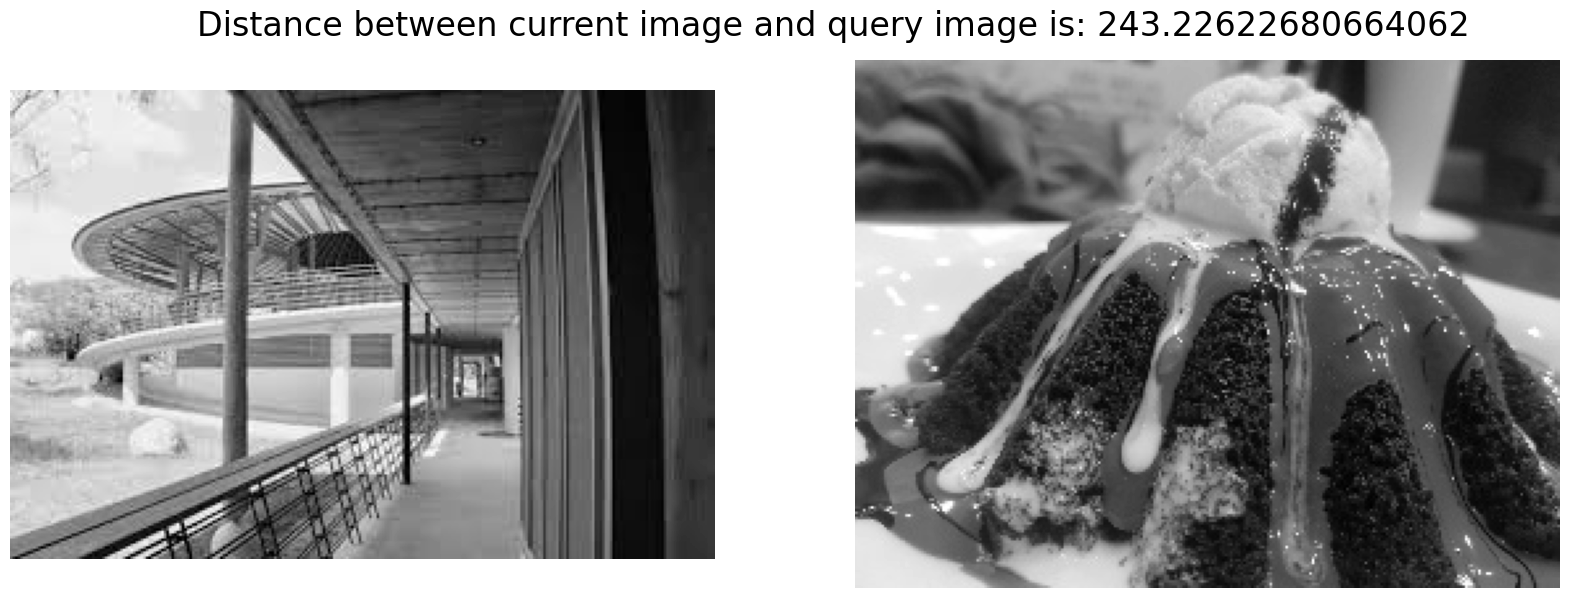

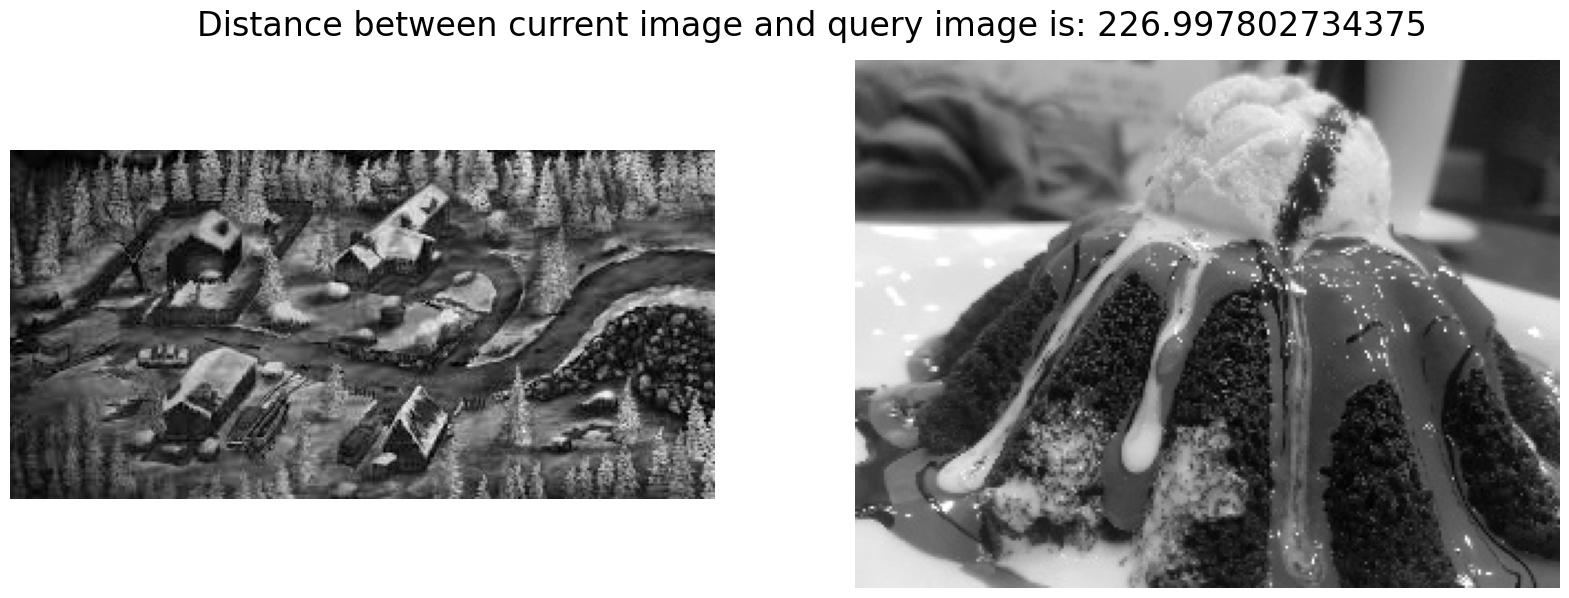

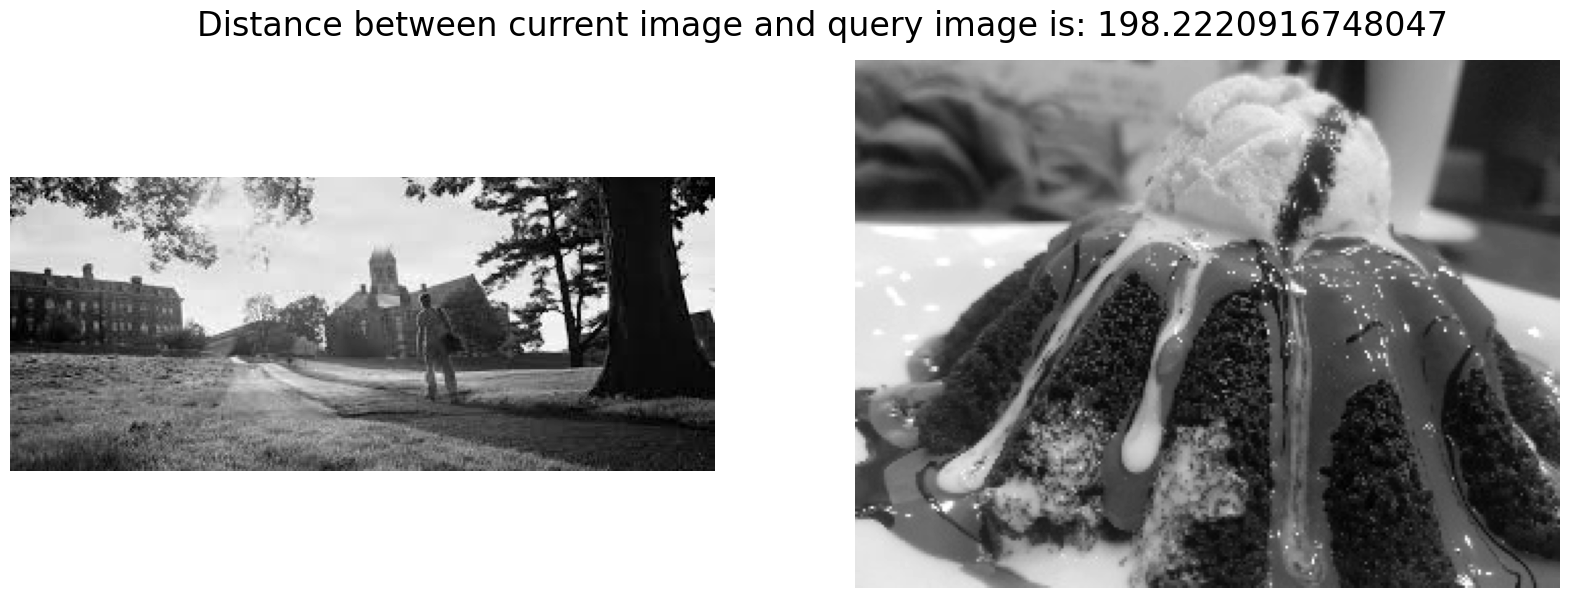

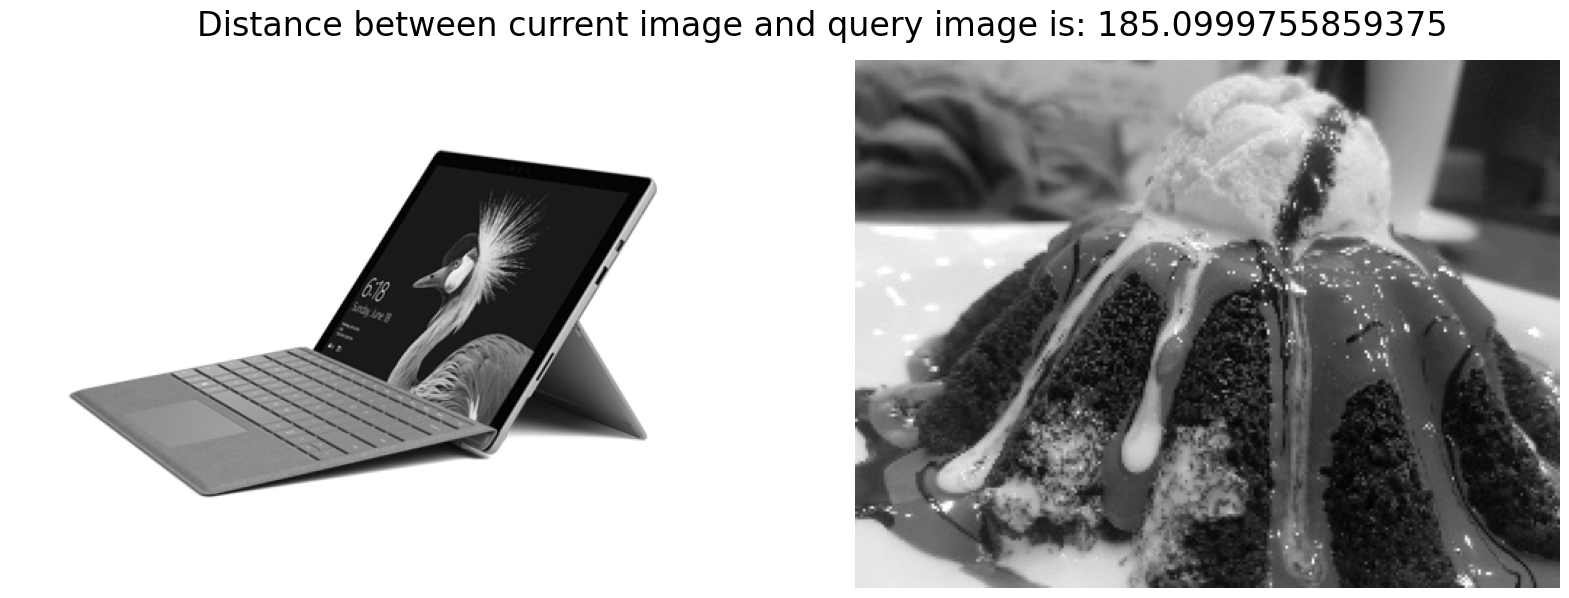

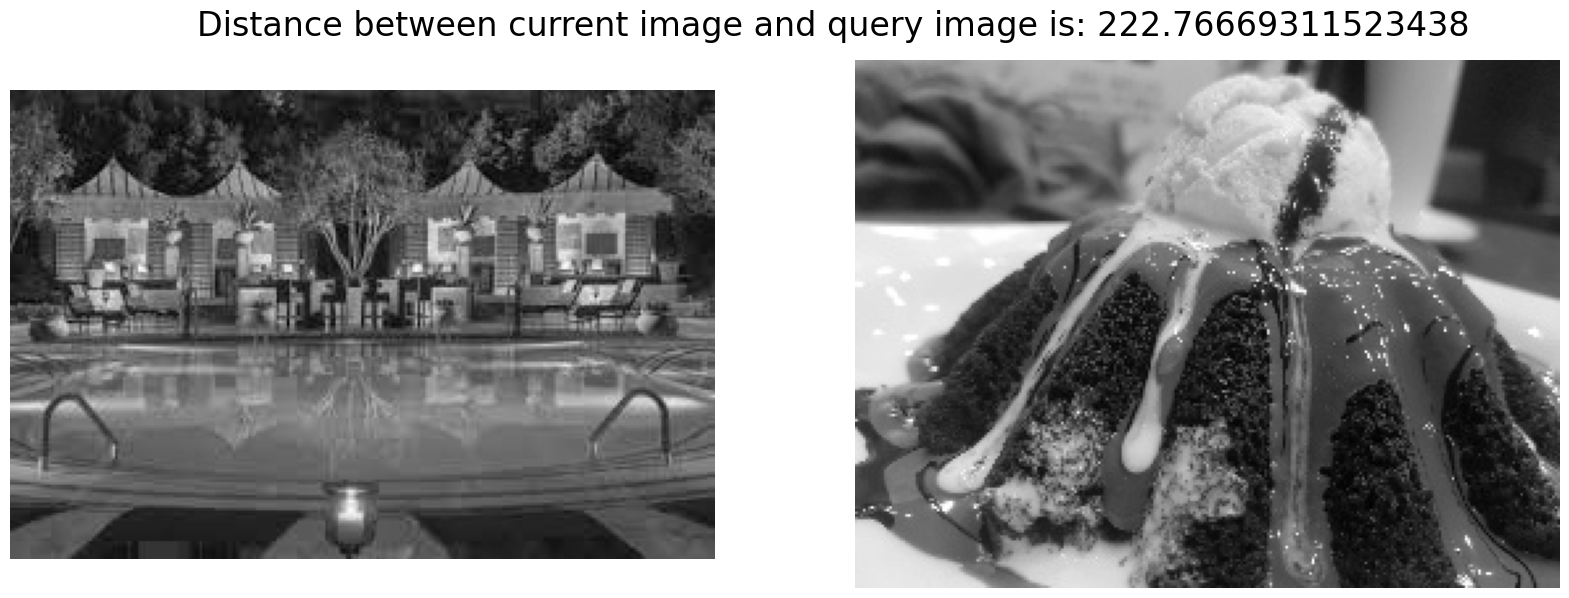

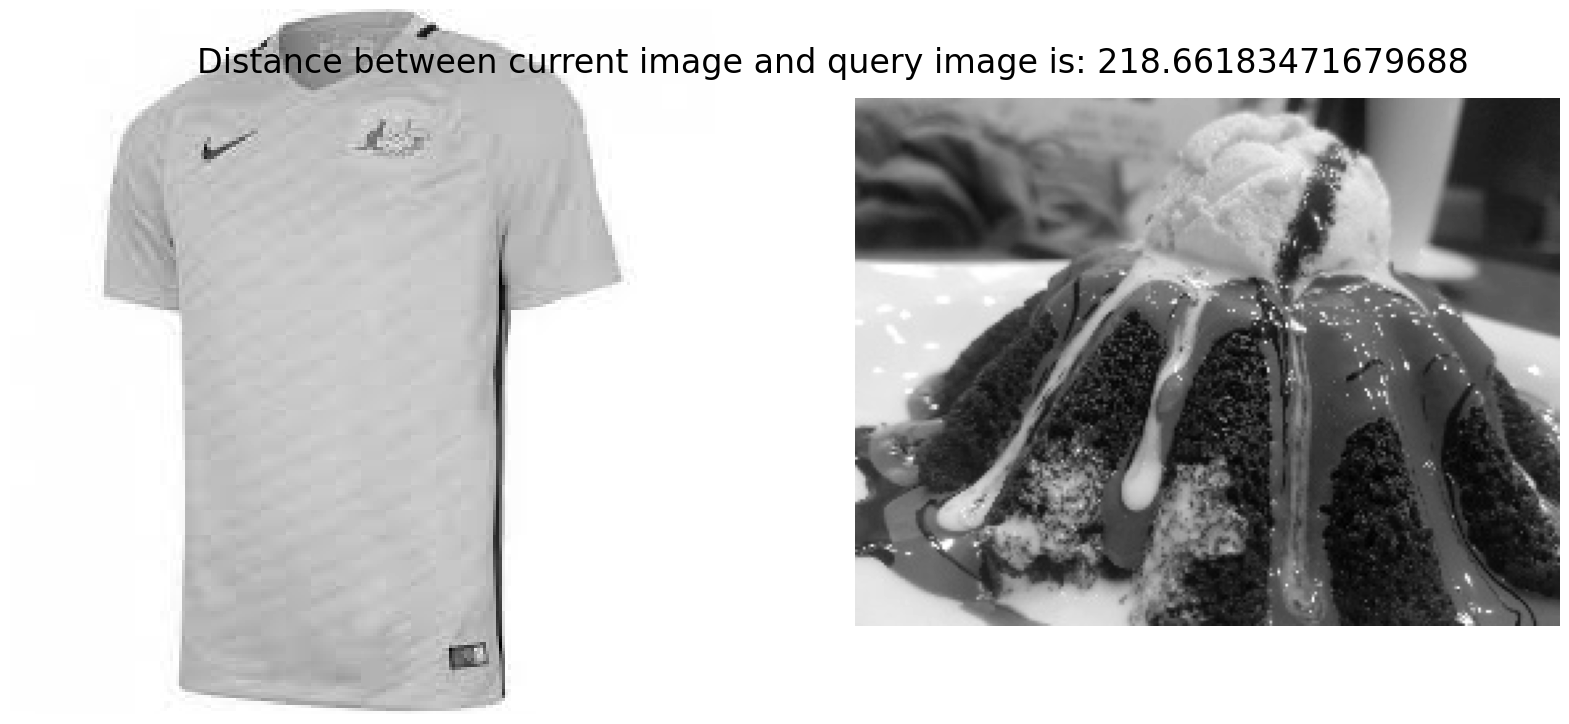

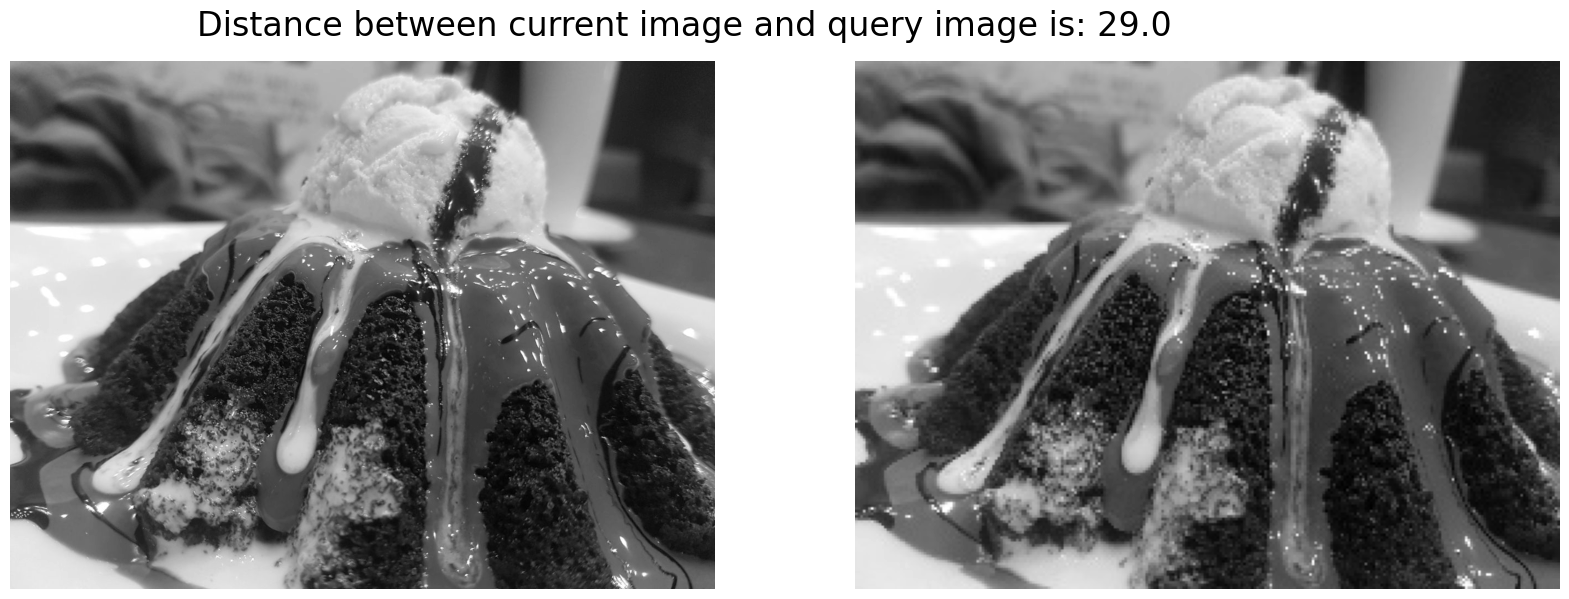

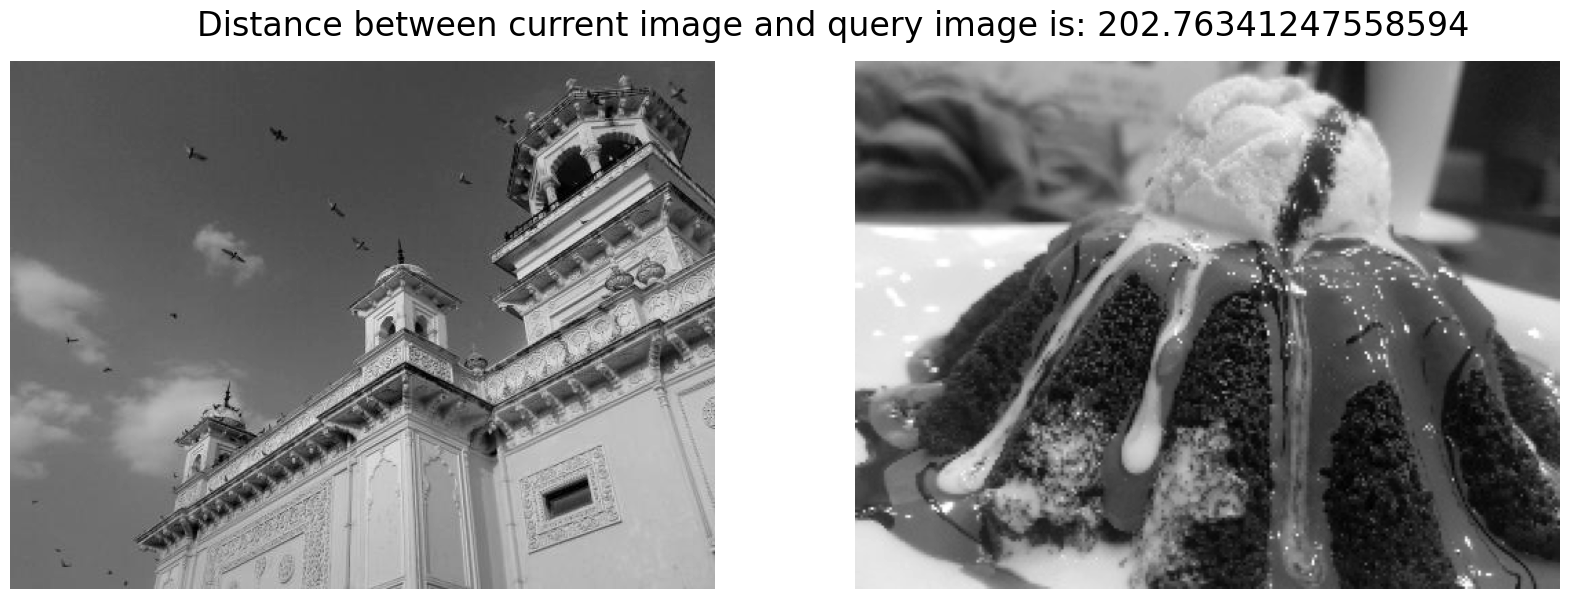

minimum distance is: 
29.0
best image Name is:
7.jpg


In [4]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

def matchImages():
    #Student Code: read query image
    query_image=cv2.imread('/content/drive/MyDrive/Copy of query.jpg',0)

    # Student Code: create sift object
    sift=cv2.xfeatures2d.SIFT_create()
    # Student Code: detect and compute sift features from the query image
    kp1,des1=sift.detectAndCompute(query_image,None)
    img_names=os.listdir('/content/drive/MyDrive/tiny_data')
    bf = cv2.BFMatcher()
    query_to_train_distances=[]
    sum=0
    for i in img_names:
        train_img_path=os.path.join('/content/drive/MyDrive/tiny_data/',i)
        # Student Code: read current train image
        img=cv2.imread(train_img_path,0)
        # Student Code: detect and compute sift features from the train image
        kp2, des2 = sift.detectAndCompute(img,None)
        # Student Code: find matches between the descriptors of the query image and train image

        matches=bf.match(des1,des2)
        matches = sorted(matches, key=lambda x: x.distance)

        # Student Code: loop on the top 10 matches with the current train image and add their distances to the variable "sum"
        for match in matches[:10]:
            sum=match.distance

        query_to_train_distances.append(sum)
        sum=0

    for i in range(len(img_names)):
        train_img = cv2.imread(os.path.join('/content/drive/MyDrive/tiny_data/',img_names[i]),0)
        s = "Distance between current image and query image is: "+str(query_to_train_distances[i])
        plt.figure(figsize=(20, 20))
        ax = plt.subplot(1, 2, 1)
        plt.imshow(train_img, cmap='gray')
        plt.axis('off')

        ax = plt.subplot(1, 2, 2)
        plt.imshow(query_image, cmap='gray')
        plt.axis('off')
        plt.text(-250, -10, s, fontsize=24)
        plt.show()

    #Student code: get the index of the train image that has the minimum distance with the query image
    index_min_distance = np.argmin(query_to_train_distances)
    print("minimum distance is: ")
    print(min(query_to_train_distances))
    print("best image Name is:")
    print(img_names[index_min_distance])

matchImages()